# Example 8-1

Calculating simple image gradients using Python

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from skimage import data, color

In [3]:
# Load the example image and turn it into grayscale
image = color.rgb2gray(data.chelsea())

In [4]:
# Compute the horizontal gradient using the centered 1D filter.
# This is equivalent to replacing each non-border pixel with the
# difference between its right and left neighbors. The leftmost
# and rightmost edges have a gradient of 0.
gx = np.empty_like(image)
gx[:, 0] = 0
gx[:, -1] = 0
gx[:, 1:-1] = image[:, :-2] - image[:, 2:]

In [5]:
# Same deal for the vertical gradient
gy = np.empty_like(image)
gy[0, :] = 0
gy[-1, :] = 0
gy[1:-1, :] = image[:-2, :] - image[2:, :]

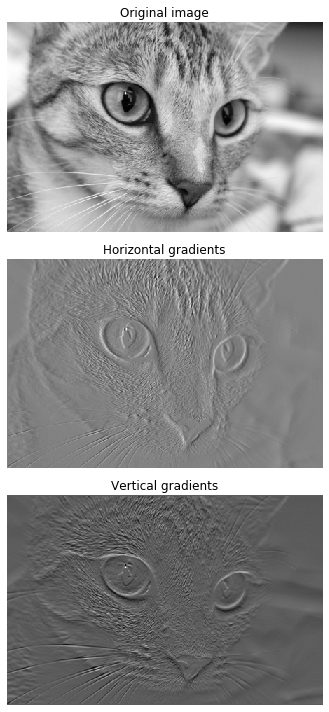

In [6]:
# Matplotlib incantations
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, 
                                    figsize=(15, 10), 
                                    sharex=True, 
                                    sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Original image')
ax1.set_adjustable('box')

ax2.axis('off')
ax2.imshow(gx, cmap=plt.cm.gray)
ax2.set_title('Horizontal gradients')
ax2.set_adjustable('box')

ax3.axis('off')
ax3.imshow(gy, cmap=plt.cm.gray)
ax3.set_title('Vertical gradients')
ax3.set_adjustable('box')

plt.tight_layout()
plt.show()

# Gradient Orientation Histograms

In [7]:
from skimage.feature import hog
from skimage import exposure

In [8]:
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

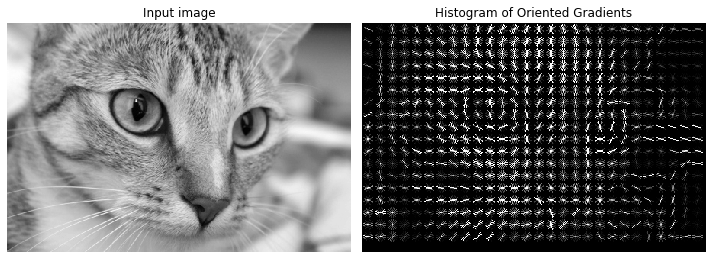

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, 
                               figsize=(10, 4), 
                               sharex=True, 
                               sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_adjustable('box')

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
ax2.set_adjustable('box')

plt.tight_layout()
plt.show()